In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Treinando classificadores utilizando GridSearch

Neste notebook seis modelos serão treinados. São eles:
- **Adaboost**: Tende a ser resistente a overfitting, porém pode ser fraco diante ruído e overliers.
- **Gradient Boosting**: Método de ensemble. Tende a ser resistente a dados nulos e selecionar automaticamente as melhores features, porẽm dá mais trabalho para fine-tunning dos hyperparametros e costuma ser mais vulnerável a overfitting.
- **Random Forest**: Modelo que combina diversas árvores de decisão. Apesar de custar mais para treinar, é bastante resistente a overfitting, ruído e outliers.
- **SVC**: Bom em datasets com muitas features e é bastante resistente a overfitting.
- **Regressão Logística**: Simples, fácil de entender e de baixo custo de treinamento. Tende a ser fraco aos outliers e se a classes não possuirem separação bem definida.
- **Gaussian Naive-Bayes**: Simples, porém tende a ser bom em datasets com muitas features e também tem bom desempenho em datasets pequenos. 

In [3]:
# Setar o seed para uso
seed = 42

## Carregando dataset

In [4]:
# Carregar o dataset como um dataframe pandas
df = pd.read_csv('data/SouthGermanCredit.asc', sep=' ')

# Print o tamanho do dataframe para comprovar que o arquivo foi carregado corretamente
df.shape

(1000, 21)

In [5]:
# Exibir uma pequena amostra do dataset
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


## Pré-processamento

Como as variáveis categoricas já estão em formato numérico, não farei nenhuma transformação nelas.

In [6]:
# Separar as variáveis categóricas e contínuas
cat_var = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']
cont_var = [col for col in df.columns if col not in cat_var]

In [7]:
# Normalizar features numéricas
scaler = StandardScaler()
df[cont_var] = scaler.fit_transform(df[cont_var])
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,-0.240857,4,2,-0.787657,1,2,4,2,1,...,2,-1.281573,3,1,1,3,2,1,2,1
1,1,-0.987573,4,0,-0.167384,1,3,2,3,1,...,1,0.040363,3,1,2,3,1,1,2,1
2,2,-0.738668,2,9,-0.861381,2,4,2,2,1,...,1,-1.105315,3,1,1,2,2,1,2,1
3,1,-0.738668,4,0,-0.407341,1,3,3,3,1,...,1,0.304750,3,1,2,2,1,1,1,1
4,1,-0.738668,4,0,-0.389974,1,3,4,3,1,...,2,0.216621,1,2,2,2,2,1,1,1


In [8]:
# Definir features e target
X = df.drop('kredit', axis=1)
y = df['kredit']

In [9]:
# Dividir dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


## Treinamento dos modelos

In [10]:
# Declarar os classificadores que serão utilizados
models = [
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed,n_jobs=-1),
    SVC(random_state=seed,probability=True),
    LogisticRegression(solver='saga', multi_class='multinomial'),
    GaussianNB()
]

In [11]:
# Definir os parâmetros que o GridSerch usará para treinar os modelos
parameters = {
    models[0].__class__.__name__:{'n_estimators':[10, 100, 1000, 5000], 'learning_rate':[0.01, 0.001, 0.0001]},
    models[1].__class__.__name__:{'n_estimators':[10, 100, 1000, 5000], 'learning_rate':[0.01, 0.001, 0.0001]},
    models[2].__class__.__name__:{'n_estimators':[1,10,100,1000, 5000], 'min_samples_split': [2,3,4,5]},
    models[3].__class__.__name__:{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
    models[4].__class__.__name__:{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
    models[5].__class__.__name__:{'var_smoothing': np.logspace(0,-9, num=100)}

}

### Treinar os modelos e avaliar os resultados

In [12]:
results = []

for model in models:
    modelname = model.__class__.__name__
    print(modelname)
    params = parameters[modelname]

    grid_pipeline = GridSearchCV(model, params)
    grid_pipeline.fit(X_train,y_train)

    pred = grid_pipeline.predict(X_test)

    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
        
    print("Accuracy: {:.4%}".format(acc))
    print("Precision: {:.4%}".format(pre))
    print("Recall: {:.4%}".format(rec))
    print("F1: {:.4%}".format(f1))
    print()

    results.append(grid_pipeline)

AdaBoostClassifier
Accuracy: 75.5000%
Precision: 79.0850%
Recall: 87.6812%
F1: 83.1615%

GradientBoostingClassifier
Accuracy: 73.5000%
Precision: 78.1457%
Recall: 85.5072%
F1: 81.6609%

RandomForestClassifier
Accuracy: 76.5000%
Precision: 79.3548%
Recall: 89.1304%
F1: 83.9590%

SVC
Accuracy: 75.5000%
Precision: 78.3439%
Recall: 89.1304%
F1: 83.3898%

LogisticRegression
Accuracy: 74.5000%
Precision: 76.6871%
Recall: 90.5797%
F1: 83.0565%

GaussianNB
Accuracy: 75.0000%
Precision: 77.5000%
Recall: 89.8551%
F1: 83.2215%



## Análise do melhor modelo: Random Forest

In [13]:
# Extrair os pesos das features
importances_rfc = results[2].best_estimator_.feature_importances_

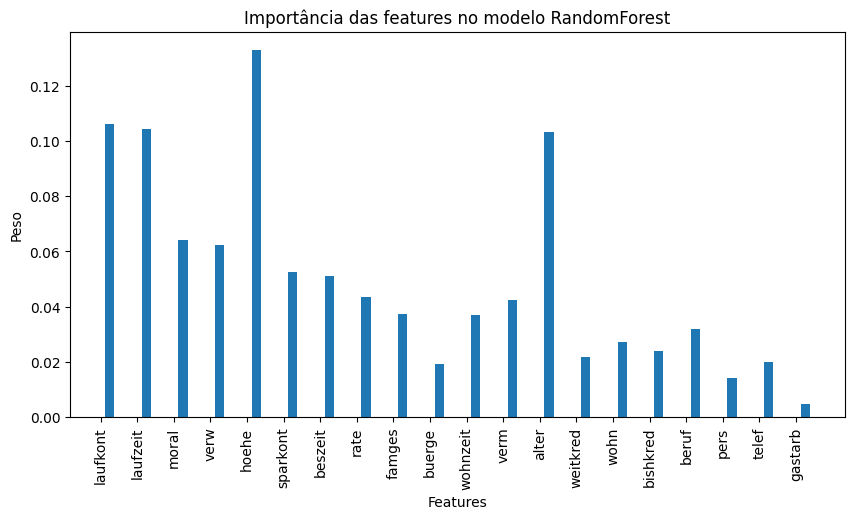

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
features = np.arange(len(importances_rfc))

width = 0.25

plt.bar(features+width, importances_rfc, width, label = 'Random')

plt.xticks(features, list(X.columns), rotation=90)
plt.title('Importância das features no modelo RandomForest')
plt.ylabel('Peso')
plt.xlabel('Features')

plt.show()